<a href="https://colab.research.google.com/github/hiteshwarsingh1/Stock-Market-Data-Ana-ysis-and-Prediction/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STOCK MARKET PREDICTION AND ANALYSIS**





In [ ]:
import pandas as pd
import numpy as np
import io
from termcolor import colored
import pandas_datareader.data as web

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns
from scipy.stats import stats
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files 

uploaded = files.upload()

Saving aapl.csv to aapl.csv
Saving amzn.csv to amzn.csv
Saving tata.csv to tata.csv
Saving tesla.csv to tesla.csv


In [ ]:
#reading the datasets
df1 = pd.read_csv("aapl.csv")
df2 = pd.read_csv("amzn.csv")
df3 = pd.read_csv("tesla.csv")
df4 = pd.read_csv("tata.csv")

In [ ]:
#replacing the '$' sign of each dataset for computations
df1[' Open'] = df1[' Open'].str.replace('$','0')
df1[' High'] = df1[' High'].str.replace('$','0')
df1[' Low'] = df1[' Low'].str.replace('$','0')
df1[' Close/Last'] = df1[' Close/Last'].str.replace('$','0')

df2[' Open'] = df2[' Open'].str.replace('$','0')
df2[' High'] = df2[' High'].str.replace('$','0')
df2[' Low'] = df2[' Low'].str.replace('$','0')
df2[' Close/Last'] = df2[' Close/Last'].str.replace('$','0')

df3[' Open'] = df3[' Open'].str.replace('$','0')
df3[' High'] = df3[' High'].str.replace('$','0')
df3[' Low'] = df3[' Low'].str.replace('$','0')
df3[' Close/Last'] = df3[' Close/Last'].str.replace('$','0')

df4[' Open'] = df4[' Open'].str.replace('$','0')
df4[' High'] = df4[' High'].str.replace('$','0')
df4[' Low'] = df4[' Low'].str.replace('$','0')
df4[' Close/Last'] = df4[' Close/Last'].str.replace('$','0')

In [ ]:
#Checking for any null value in each dataset
print(df1[df1.isnull().any(axis=1)])
print(df2[df2.isnull().any(axis=1)])
print(df3[df3.isnull().any(axis=1)])
print(df4[df4.isnull().any(axis=1)])

Empty DataFrame
Columns: [Date,  Close/Last,  Volume,  Open,  High,  Low]
Index: []
Empty DataFrame
Columns: [Date,  Close/Last,  Volume,  Open,  High,  Low]
Index: []
Empty DataFrame
Columns: [Date,  Close/Last,  Volume,  Open,  High,  Low]
Index: []
Empty DataFrame
Columns: [Date,  Close/Last,  Volume,  Open,  High,  Low]
Index: []


In [ ]:
#conversion of String datatype to float datatype for plotting graphs
df1[' Open'] = df1[' Open'].astype(float)
df1[' High'] = df1[' High'].astype(float)
df1[' Low'] = df1[' Low'].astype(float)
df1[' Close/Last'] = df1[' Close/Last'].astype(float)

df2[' Open'] = df2[' Open'].astype(float)
df2[' High'] = df2[' High'].astype(float)
df2[' Low'] = df2[' Low'].astype(float)
df2[' Close/Last'] = df2[' Close/Last'].astype(float)

df3[' Open'] = df3[' Open'].astype(float)
df3[' High'] = df3[' High'].astype(float)
df3[' Low'] = df3[' Low'].astype(float)
df3[' Close/Last'] = df3[' Close/Last'].astype(float)

df4[' Open'] = df4[' Open'].astype(float)
df4[' High'] = df4[' High'].astype(float)
df4[' Low'] = df4[' Low'].astype(float)
df4[' Close/Last'] = df4[' Close/Last'].astype(float)

print(df1.head())
print(df2.head())
print(df3.head())
print(df4.head())

         Date   Close/Last     Volume    Open    High       Low
0  10/30/2020       108.86  190573500  111.06  111.99  107.7200
1  10/29/2020       115.32  146129200  112.37  116.93  112.2000
2  10/28/2020       111.20  143937800  115.05  115.43  111.1000
3  10/27/2020       116.60   92276770  115.49  117.28  114.5399
4  10/26/2020       115.05  111850700  114.01  116.55  112.8800
         Date   Close/Last   Volume     Open       High      Low
0  10/30/2020      3036.15  8396081  3157.75  3167.0040  3019.00
1  10/29/2020      3211.01  6596529  3201.27  3257.2500  3164.00
2  10/28/2020      3162.78  5588330  3249.30  3264.0200  3162.47
3  10/27/2020      3286.33  4291047  3224.94  3291.6600  3211.30
4  10/26/2020      3207.04  5901151  3198.74  3282.9799  3153.30
         Date   Close/Last    Volume      Open      High       Low
0  11/05/2020       438.09  28414520  428.3000  440.0000  424.0001
1  11/04/2020       420.98  32143060  430.6200  435.4000  417.1000
2  11/03/2020       423.9

In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'].max()-df1['Date'].min()
df1.iloc[-90:].describe().astype(int)
df1.index = df1['Date']

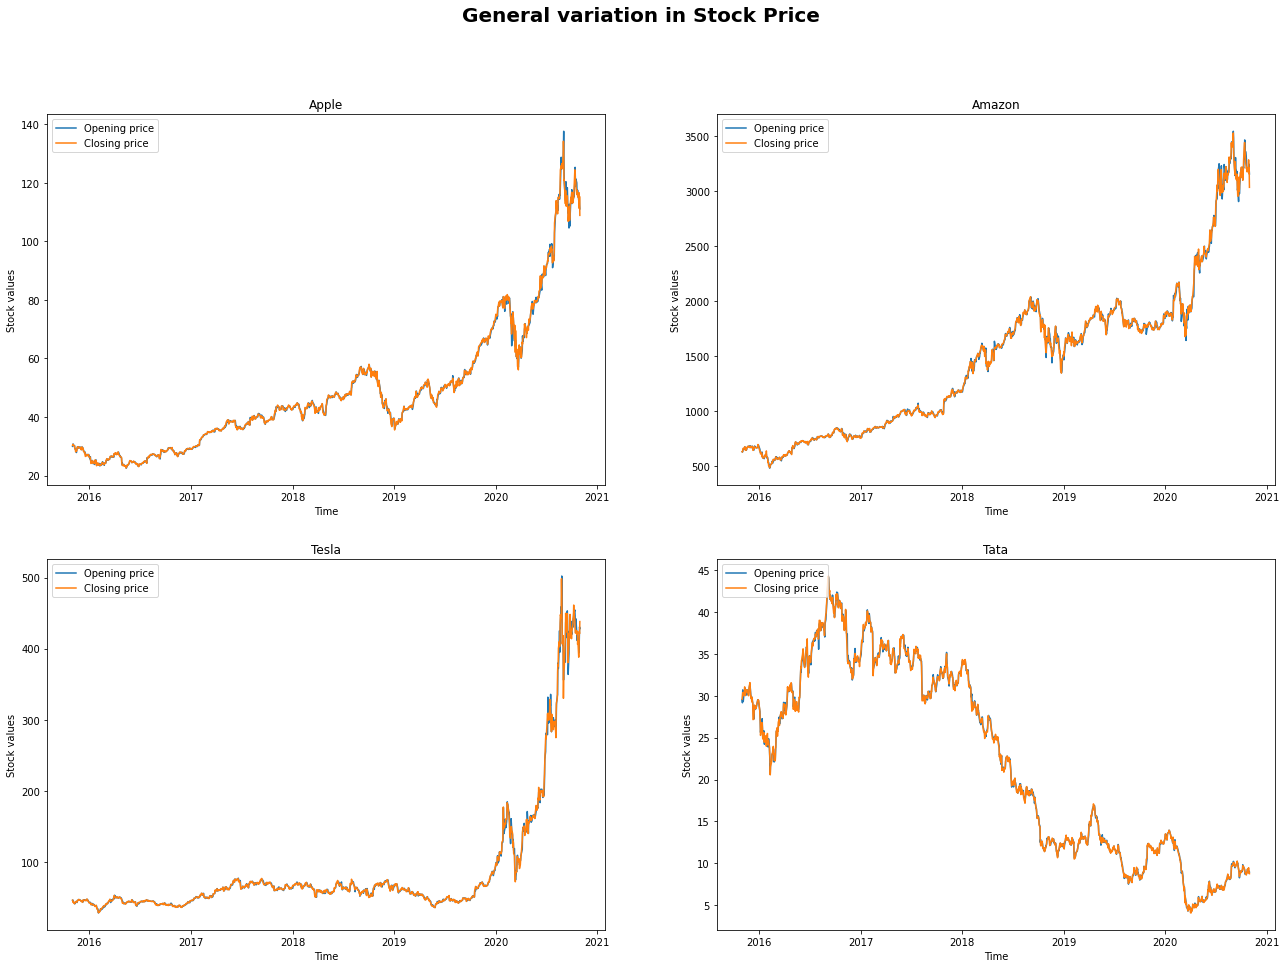

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(22,15))
fig.suptitle('General variation in Stock Price',fontsize=20, fontweight ="bold")

#first dataset
x = df1.index
y11 = df1[' Open']
y14 = df1[' Close/Last']

ax1.plot(x, y11, label = 'Opening price') 
ax1.plot(x, y14, label = 'Closing price')
ax1.legend(loc='upper left')
ax1.set_xlabel('Time')
ax1.set_ylabel('Stock values')
ax1.set_title('Apple')

#second dataset
y21 = df2[' Open']
y24 = df2[' Close/Last']

ax2.plot(x, y21, label = 'Opening price')  
ax2.plot(x, y24, label = 'Closing price')
ax2.legend(loc='upper left')
ax2.set_xlabel('Time')
ax2.set_ylabel('Stock values')
ax2.set_title('Amazon')

#Third dataset
y31 = df3[' Open']
y34 = df3[' Close/Last']

ax3.plot(x, y31, label = 'Opening price') 
ax3.plot(x, y34, label = 'Closing price')
ax3.legend(loc='upper left')
ax3.set_xlabel('Time')
ax3.set_ylabel('Stock values')
ax3.set_title('Tesla')

#for fourth dataset
y41 = df4[' Open']
y44 = df4[' Close/Last']

ax4.plot(x, y41, label = 'Opening price') 
ax4.plot(x, y44, label = 'Closing price')
ax4.legend(loc='upper left')
ax4.set_xlabel('Time')
ax4.set_ylabel('Stock values')
ax4.set_title('Tata')
plt.show()

In [ ]:
#calculating the daily percentage change (DAILY RETURNS) for each company
df1['Day_perc_change'] = df1[' Close/Last'].pct_change()*100
df1.dropna(axis = 0, inplace = True)

df2['Day_perc_change'] = df2[' Close/Last'].pct_change()*100
df2.dropna(axis = 0, inplace = True)

df3['Day_perc_change'] = df3[' Close/Last'].pct_change()*100
df3.dropna(axis = 0, inplace = True)

df4['Day_perc_change'] = df4[' Close/Last'].pct_change()*100
df4.dropna(axis = 0, inplace = True)

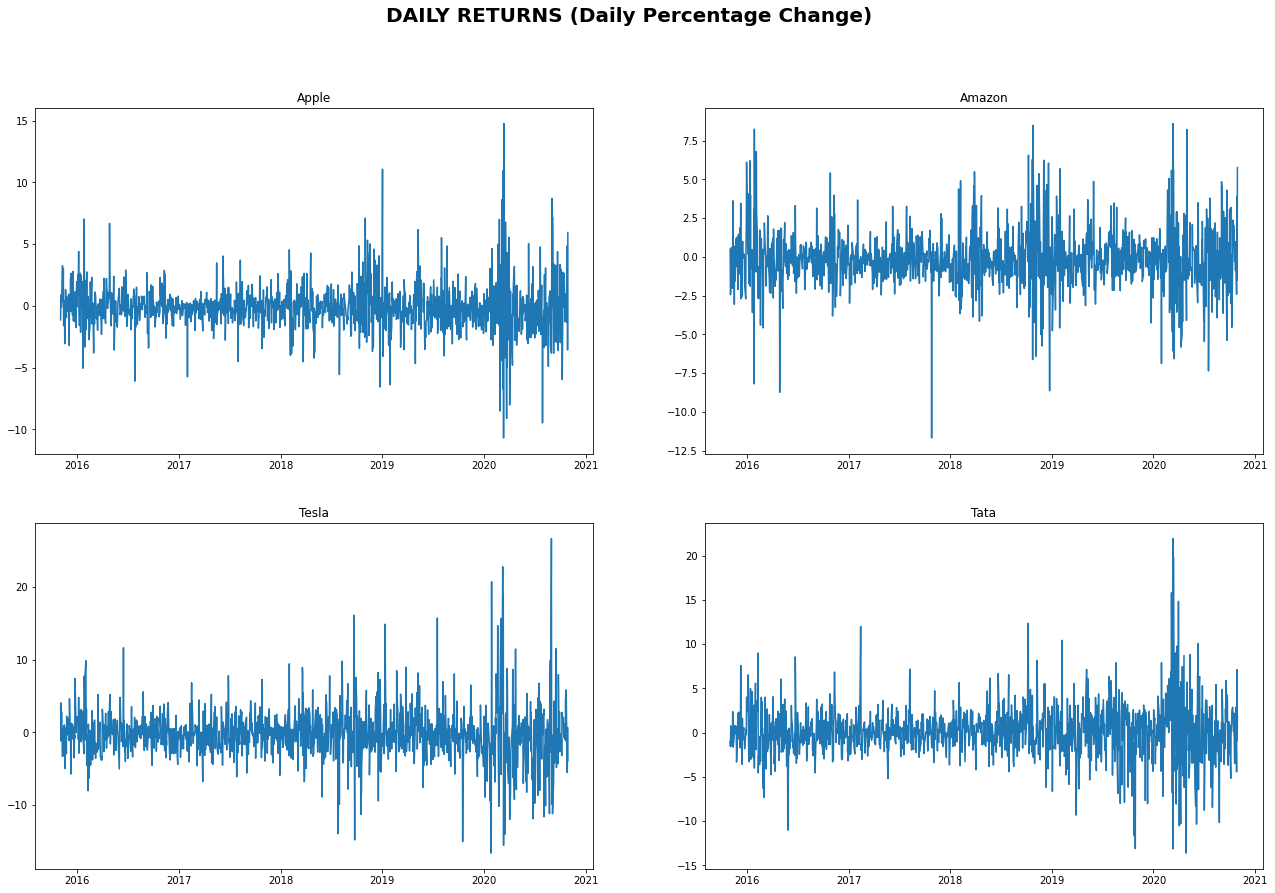

APPLE - It can be observed that for most of the days, the returns are between -5% to 5% with few spikes in between crossing 10% mark on both the sides.
AMAZON - It can be observed that for most of the days, the returns are between -3.5% to 3.5% with few spikes in between crossing 7.5% mark on both the sides.
TESLA - It can be observed that for most of the days, the returns are between -4% to 4% with few spikes in between crossing 10% mark on both the sides.
TATA - It can be observed that for most of the days, the returns are between -5% to 5% with few spikes in between crossing 15% mark on both the sides.


In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(22,14))
fig.suptitle('DAILY RETURNS (Daily Percentage Change)',fontsize=20, fontweight ="bold")
x = df1.index
y1 = df1['Day_perc_change']
y2 = df2['Day_perc_change']
y3 = df3['Day_perc_change']
y4 = df4['Day_perc_change']

ax1.plot(x,y1)
ax1.set_title('Apple')

ax2.plot(x,y2)
ax2.set_title('Amazon')

ax3.plot(x,y3)
ax3.set_title('Tesla')

ax4.plot(x,y4)
ax4.set_title('Tata')
plt.show()

print(colored('APPLE - It can be observed that for most of the days, the returns are between -5% to 5% with few spikes in between crossing 10% mark on both the sides.', 'cyan', attrs=['bold']))
print(colored('AMAZON - It can be observed that for most of the days, the returns are between -3.5% to 3.5% with few spikes in between crossing 7.5% mark on both the sides.', 'red', attrs=['bold']))
print(colored('TESLA - It can be observed that for most of the days, the returns are between -4% to 4% with few spikes in between crossing 10% mark on both the sides.', 'cyan', attrs=['bold']))
print(colored('TATA - It can be observed that for most of the days, the returns are between -5% to 5% with few spikes in between crossing 15% mark on both the sides.', 'red', attrs=['bold']))

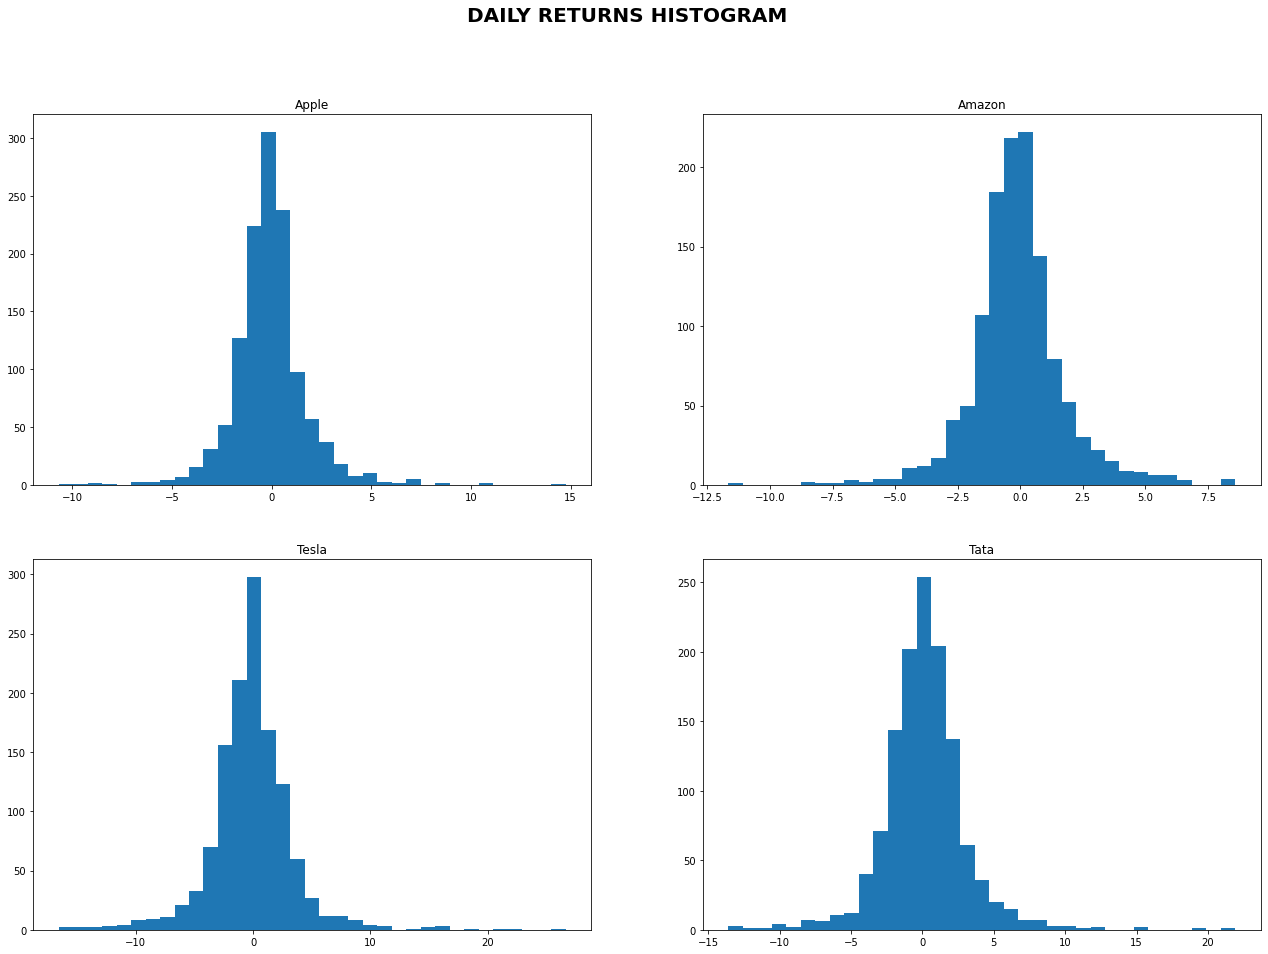

In [ ]:
n_bins = 35
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(22,15))
fig.suptitle('DAILY RETURNS HISTOGRAM',fontsize=20, fontweight ="bold")

x1 = df1['Day_perc_change']
x2 = df2['Day_perc_change']
x3 = df3['Day_perc_change']
x4 = df4['Day_perc_change']

ax1.hist(x1,bins = n_bins)
ax1.set_title('Apple')
ax2.hist(x2,bins = n_bins)
ax2.set_title('Amazon')
ax3.hist(x3,bins = n_bins)
ax3.set_title('Tesla')
ax4.hist(x4,bins = n_bins)
ax4.set_title('Tata')
plt.show()

# **COMPANY STATS**

In [ ]:
print('APPLE : \n', df1.Day_perc_change.describe())

APPLE : 
 count    1258.000000
mean       -0.083599
std         1.904526
min       -10.698996
25%        -0.978446
50%        -0.089435
75%         0.635820
max        14.764048
Name: Day_perc_change, dtype: float64


# **APPLE**
### The daily returns histogram is centered about origin. For the past 5 years, the mean daily returns has been about -0.083 and for most of the days the daily return was less than 1% implying that the APPLE stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 14.76% and was 10.69% in negative direction. 

In [ ]:
print('AMAZON : \n', df2.Day_perc_change.describe())

AMAZON : 
 count    1258.000000
mean       -0.107054
std         1.901670
min       -11.673555
25%        -1.057788
50%        -0.143052
75%         0.697478
max         8.603671
Name: Day_perc_change, dtype: float64


# **AMAZON**
### The daily returns histogram is centered about origin. For the past 5 years, the mean daily returns has been about -0.017 and for most of the days the daily return was less than 1% implying that the AMAZON stock has also been less volatile. During the period, the highest % change in positive direction was observed to be 8.6% and was 11.67% in negative direction. 

In [ ]:
print('TESLA : \n', df3.Day_perc_change.describe())

TESLA : 
 count    1258.000000
mean       -0.113417
std         3.618145
min       -16.593590
25%        -1.824022
50%        -0.125771
75%         1.426834
max        26.683020
Name: Day_perc_change, dtype: float64


# **TESLA**
### The daily returns histogram is centered about origin. For the past 5 years, the mean daily returns has been about -0.11 and for most of the days the daily return was less than 1% implying that the TESLA stock has been less volatile. During the period, the highest % change in positive direction was observed to be 26.68% and was 16.59% in negative direction. 

In [ ]:
print('TATA : \n', df4.Day_perc_change.describe())

TATA : 
 count    1258.000000
mean        0.140316
std         2.968418
min       -13.605442
25%        -1.340370
50%         0.054340
75%         1.490725
max        21.928166
Name: Day_perc_change, dtype: float64


# **TATA**
### The daily returns histogram is centered about origin. For the past 5 years, the mean daily returns has been about 0.14 and for most of the days the daily return was less than 1% implying that the TATA stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 21.92% and was 13.60% in negative direction. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significant

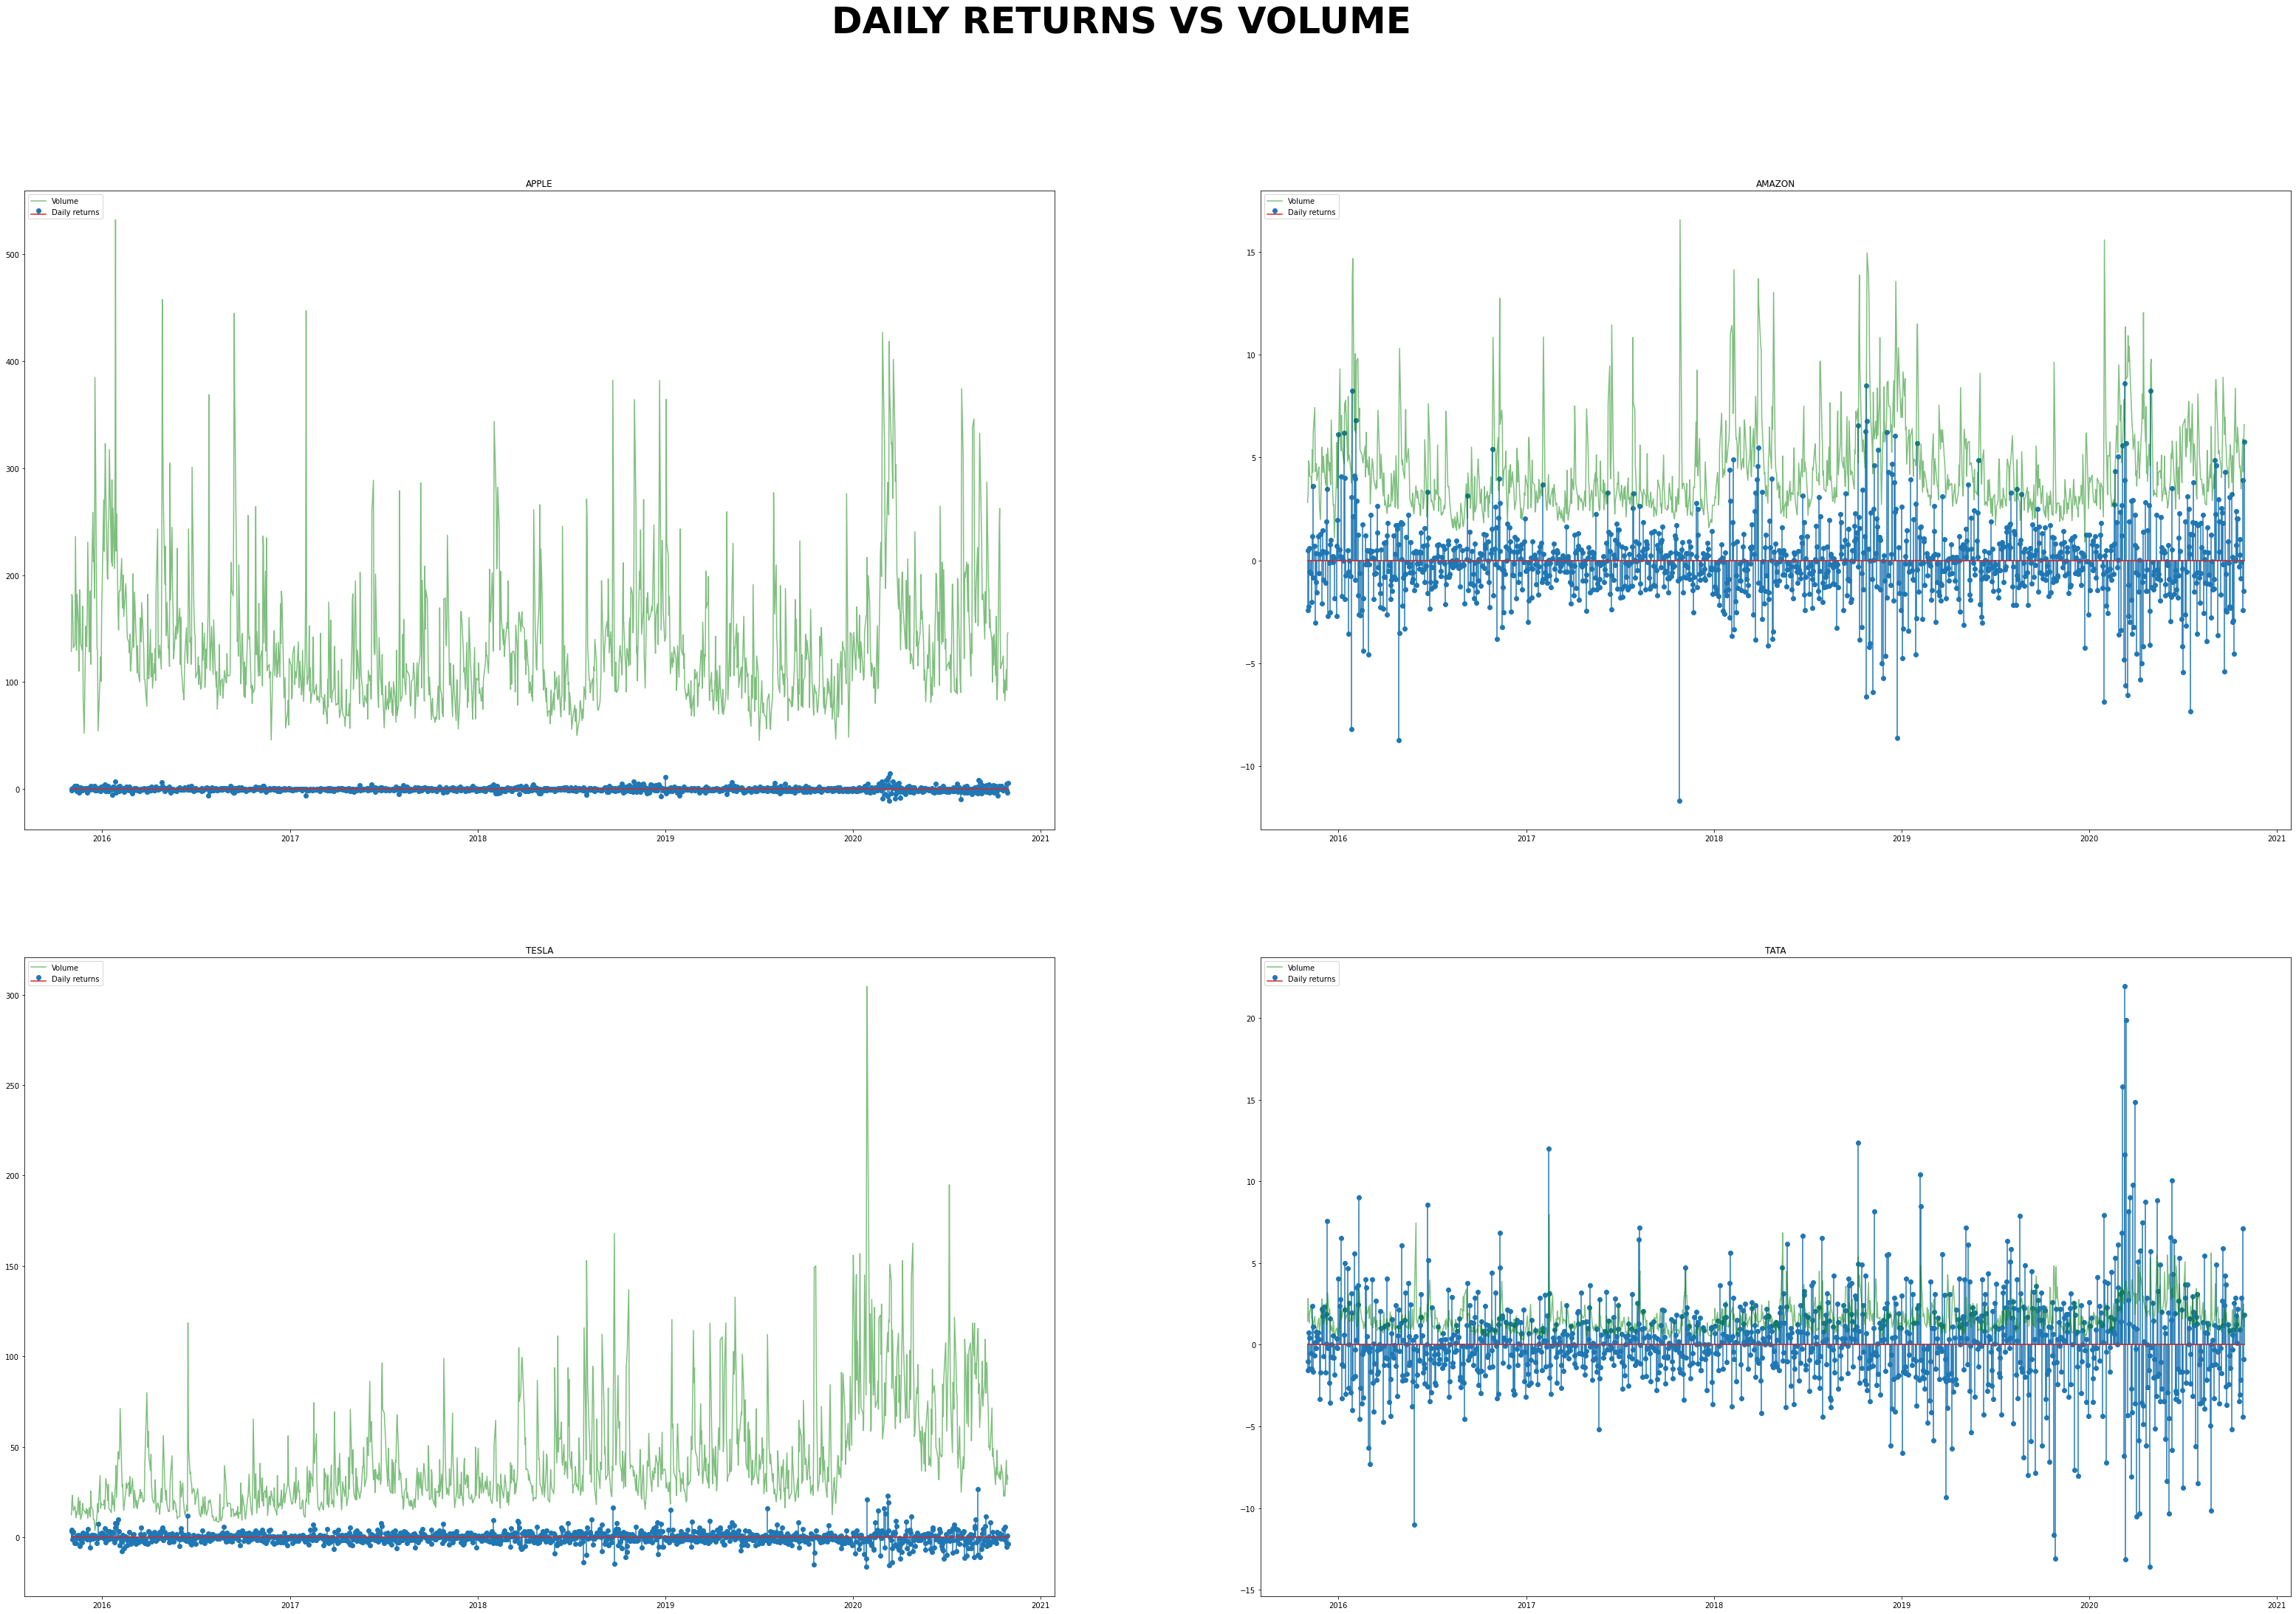

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(55,35))
fig.suptitle('DAILY RETURNS VS VOLUME',fontsize=50, fontweight ="bold")
x = df1.index
ax1.stem(x,df1['Day_perc_change'], label = 'Daily returns')
ax1.plot(x,(df1[' Volume']/1000000), color = 'green', alpha=0.5, label = 'Volume')
ax1.set_title("APPLE")
ax1.legend(loc='upper left')

ax2.stem(x,df2['Day_perc_change'], label = 'Daily returns')
ax2.plot(x,(df2[' Volume']/1000000), color = 'green', alpha=0.5, label = 'Volume')
ax2.set_title("AMAZON")
ax2.legend(loc='upper left')

ax3.stem(x,df3['Day_perc_change'], label = 'Daily returns')
ax3.plot(x,(df3[' Volume']/1000000), color = 'green', alpha=0.5, label = 'Volume')
ax3.set_title("TESLA")
ax3.legend(loc='upper left')

ax4.stem(x,df4['Day_perc_change'], label = 'Daily returns')
ax4.plot(x,(df4[' Volume']/1000000), color = 'green', alpha=0.5, label = 'Volume')
ax4.set_title("TATA")
ax4.legend(loc='upper left')

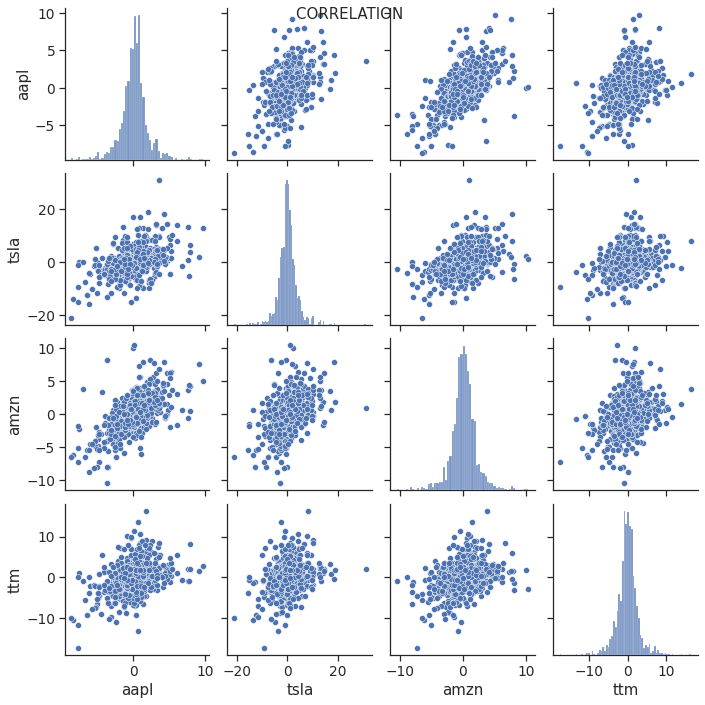

The correlation coefficient between any pair of stocks should be close to 0. Here, no two stocks show any significant correlation, therefore there is no chance of falling of one stock due to other.


In [ ]:
combined_df = web.DataReader(['aapl', 'tsla', 'amzn','ttm'],'yahoo')['Open']
pct_chg_df = combined_df.pct_change()*100

sns.set(style = 'ticks', font_scale = 1.25)
p = sns.pairplot(pct_chg_df)
plt.suptitle('CORRELATION ', size = 15);
plt.show()

print(colored('The correlation coefficient between any pair of stocks should be close to 0. Here, no two stocks show any significant correlation, therefore there is no chance of falling of one stock due to other.', 'red', attrs=['bold']))

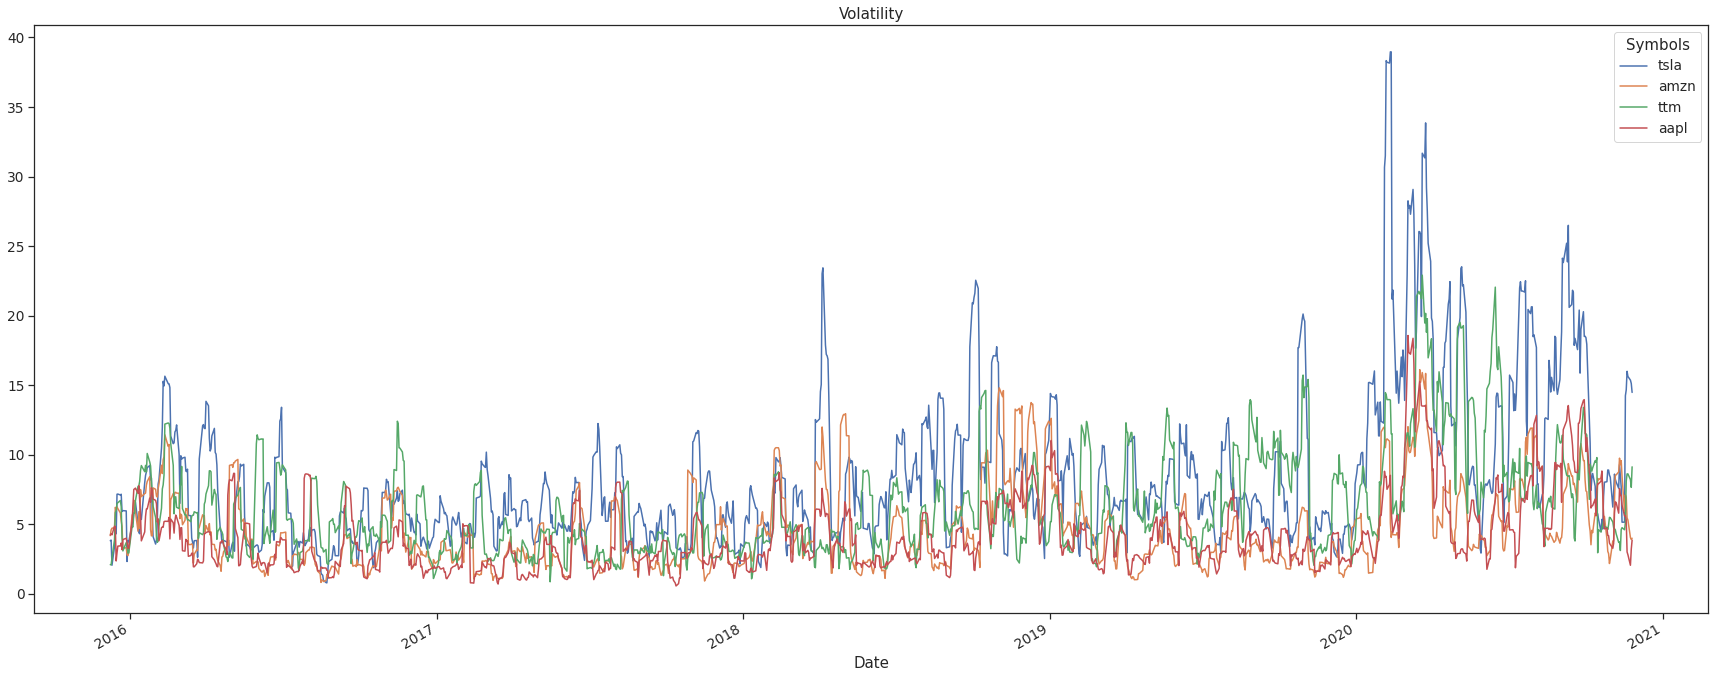

This can be clearly observed that Tesla stock has higher volatility as compared to Apple, Amazon and Tata stocks while the Apple and Amazon index has comparatively least volatility.
Higher the volatility, higher the profit potential and risk.


In [ ]:
df2["Date"] = x
volatility = pct_chg_df[['tsla', 'amzn', 'ttm','aapl']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (30, 12))
plt.title("Volatility")
plt.show()
print(colored('This can be clearly observed that Tesla stock has higher volatility as compared to Apple, Amazon and Tata stocks while the Apple and Amazon index has comparatively least volatility.', 'blue', attrs=['bold']))
print(colored('Higher the volatility, higher the profit potential and risk.', 'red', attrs=['bold']))

# **TREND ANALYSIS**

In [ ]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'

df1['Trend']= np.zeros(df1['Day_perc_change'].count())
df1['Trend']= df1['Day_perc_change'].apply(lambda x:trend(x))

df2['Trend']= np.zeros(df2['Day_perc_change'].count())
df2['Trend']= df2['Day_perc_change'].apply(lambda x:trend(x))

df3['Trend']= np.zeros(df3['Day_perc_change'].count())
df3['Trend']= df3['Day_perc_change'].apply(lambda x:trend(x))

df4['Trend']= np.zeros(df4['Day_perc_change'].count())
df4['Trend']= df4['Day_perc_change'].apply(lambda x:trend(x))

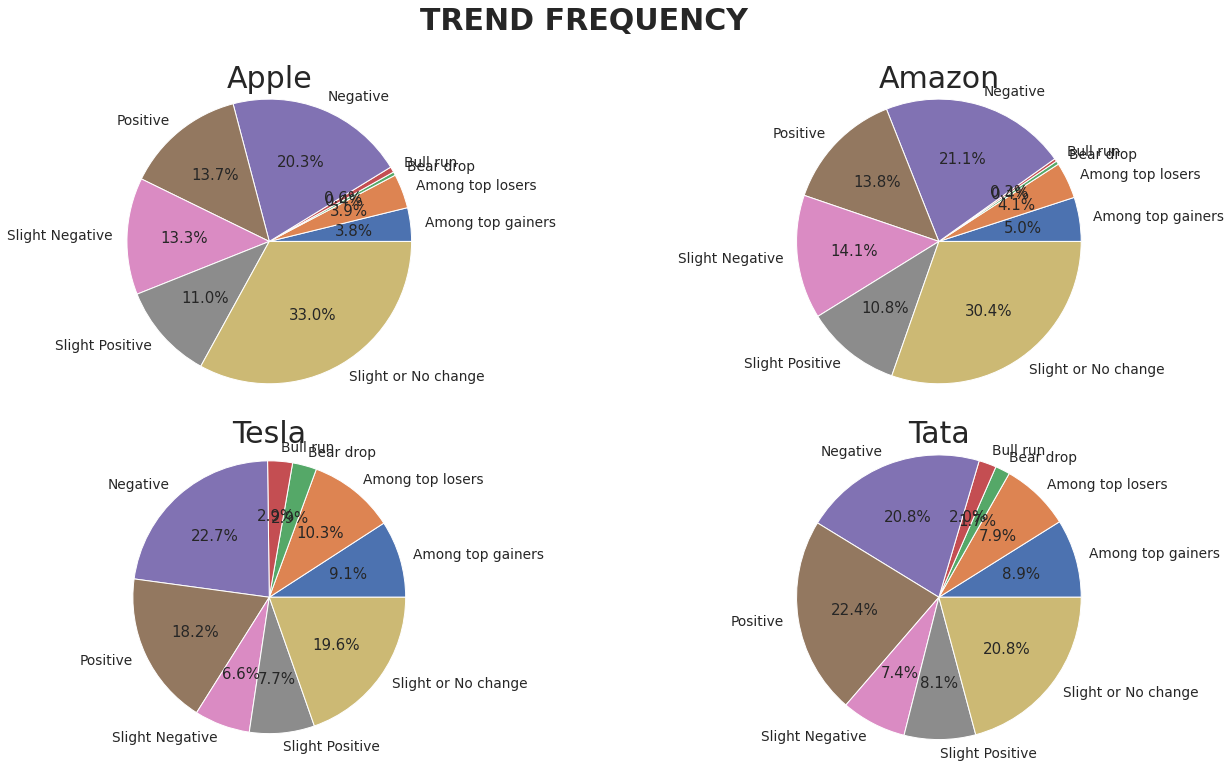

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(22,12))
fig.suptitle('TREND FREQUENCY',fontsize=30, fontweight ="bold")

piedata1 = df1.groupby('Trend')
pie_label1 = sorted([i for i in df1.loc[:, 'Trend'].unique()])
ax1.pie(piedata1['Trend'].count(), labels = pie_label1, autopct = '%1.1f%%', radius = 1.2)
ax1.set_title('Apple', fontsize= 30)

piedata2 = df2.groupby('Trend')
pie_label2 = sorted([i for i in df2.loc[:, 'Trend'].unique()])
ax2.pie(piedata2['Trend'].count(), labels = pie_label2, autopct = '%1.1f%%', radius = 1.2)
ax2.set_title('Amazon', fontsize= 30)

piedata3 = df3.groupby('Trend')
pie_label3 = sorted([i for i in df3.loc[:, 'Trend'].unique()])
ax3.pie(piedata3['Trend'].count(), labels = pie_label3, autopct = '%1.1f%%', radius = 1.15)
ax3.set_title('Tesla', fontsize= 30)

piedata4 = df4.groupby('Trend')
pie_label4 = sorted([i for i in df4.loc[:, 'Trend'].unique()])
ax4.pie(piedata4['Trend'].count(), labels = pie_label4, autopct = '%1.1f%%', radius = 1.2)
ax4.set_title('Tata', fontsize= 30)
plt.show()

# **PREDICTIONS**

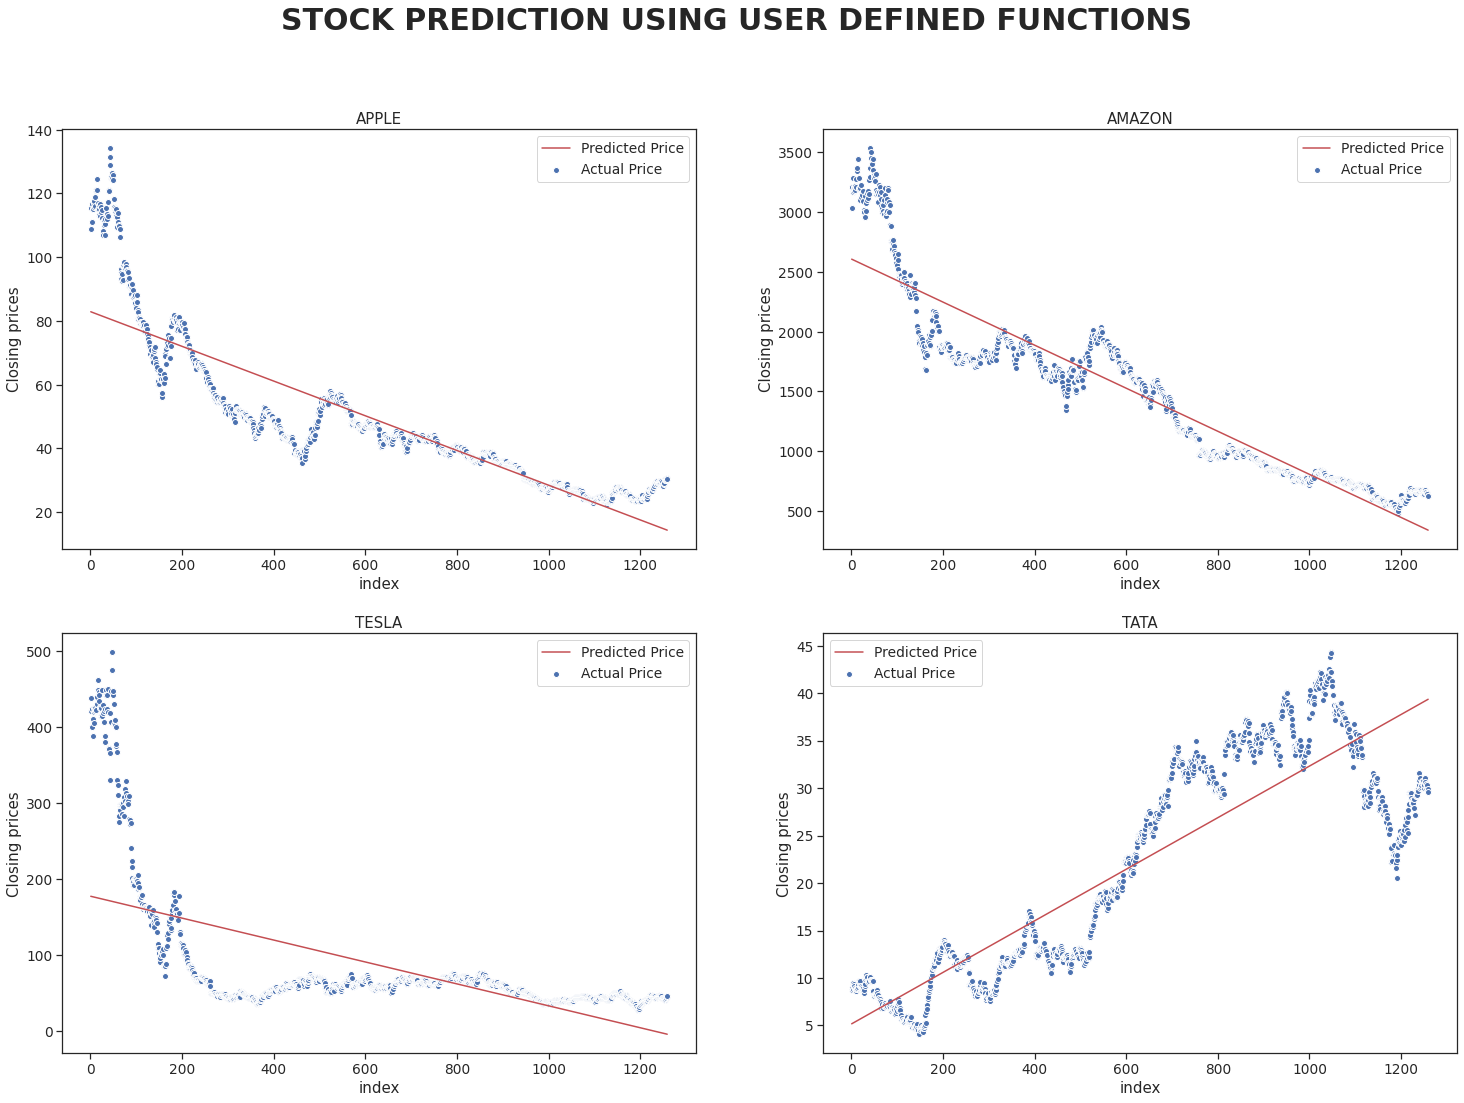

In [ ]:
def estimate_coef(x, y): 
	n = np.size(x)+1
	m_x, m_y = np.mean(x), np.mean(y) 
 
	SS_xy = np.sum(y*x) - n*m_y*m_x 
	SS_xx = np.sum(x*x) - n*m_x*m_x 

	b_1 = SS_xy / SS_xx 
	b_0 = m_y - b_1*m_x 

	return(b_0, b_1) 

def plot_regression_line(x, y, b): 
	plt.scatter(x, y, color = "m") 
	y_pred = b[0] + b[1]*x 
	plt.plot(x, y_pred, color = "g") 
 
	plt.xlabel('x') 
	plt.ylabel('Opening prices') 
	plt.show() 
 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(25,17))
fig.suptitle('STOCK PREDICTION USING USER DEFINED FUNCTIONS',fontsize=30, fontweight ="bold")
 
a = df2.index
a = np.append(a,[np.size(a)+1])
b1 = estimate_coef(a, y14)
ax1.scatter(a, y14, edgecolor='w', label='Actual Price') 
y_pred = b1[0] + b1[1]*a 
ax1.plot(a, y_pred, color='r', label='Predicted Price') 
ax1.set_title('APPLE')
ax1.set_xlabel('index') 
ax1.set_ylabel('Closing prices') 
ax1.legend()

b2 = estimate_coef(a, y24)
ax2.scatter(a, y24, edgecolor='w', label='Actual Price') 
y_pred = b2[0] + b2[1]*a 
ax2.plot(a, y_pred, color='r', label='Predicted Price') 
ax2.set_title('AMAZON')
ax2.set_xlabel('index') 
ax2.set_ylabel('Closing prices') 
ax2.legend()

b3 = estimate_coef(a, y34)
ax3.scatter(a, y34,  edgecolor='w', label='Actual Price') 
y_pred = b3[0] + b3[1]*a 
ax3.plot(a, y_pred, color='r', label='Predicted Price') 
ax3.set_title('TESLA')
ax3.set_xlabel('index') 
ax3.set_ylabel('Closing prices') 
ax3.legend()

b4 = estimate_coef(a, y44)
ax4.scatter(a, y44, edgecolor='w', label='Actual Price') 
y_pred = b4[0] + b4[1]*a 
ax4.plot(a, y_pred, color='r', label='Predicted Price') 
ax4.set_title('TATA')
ax4.set_xlabel('index') 
ax4.set_ylabel('Closing prices') 
ax4.legend()


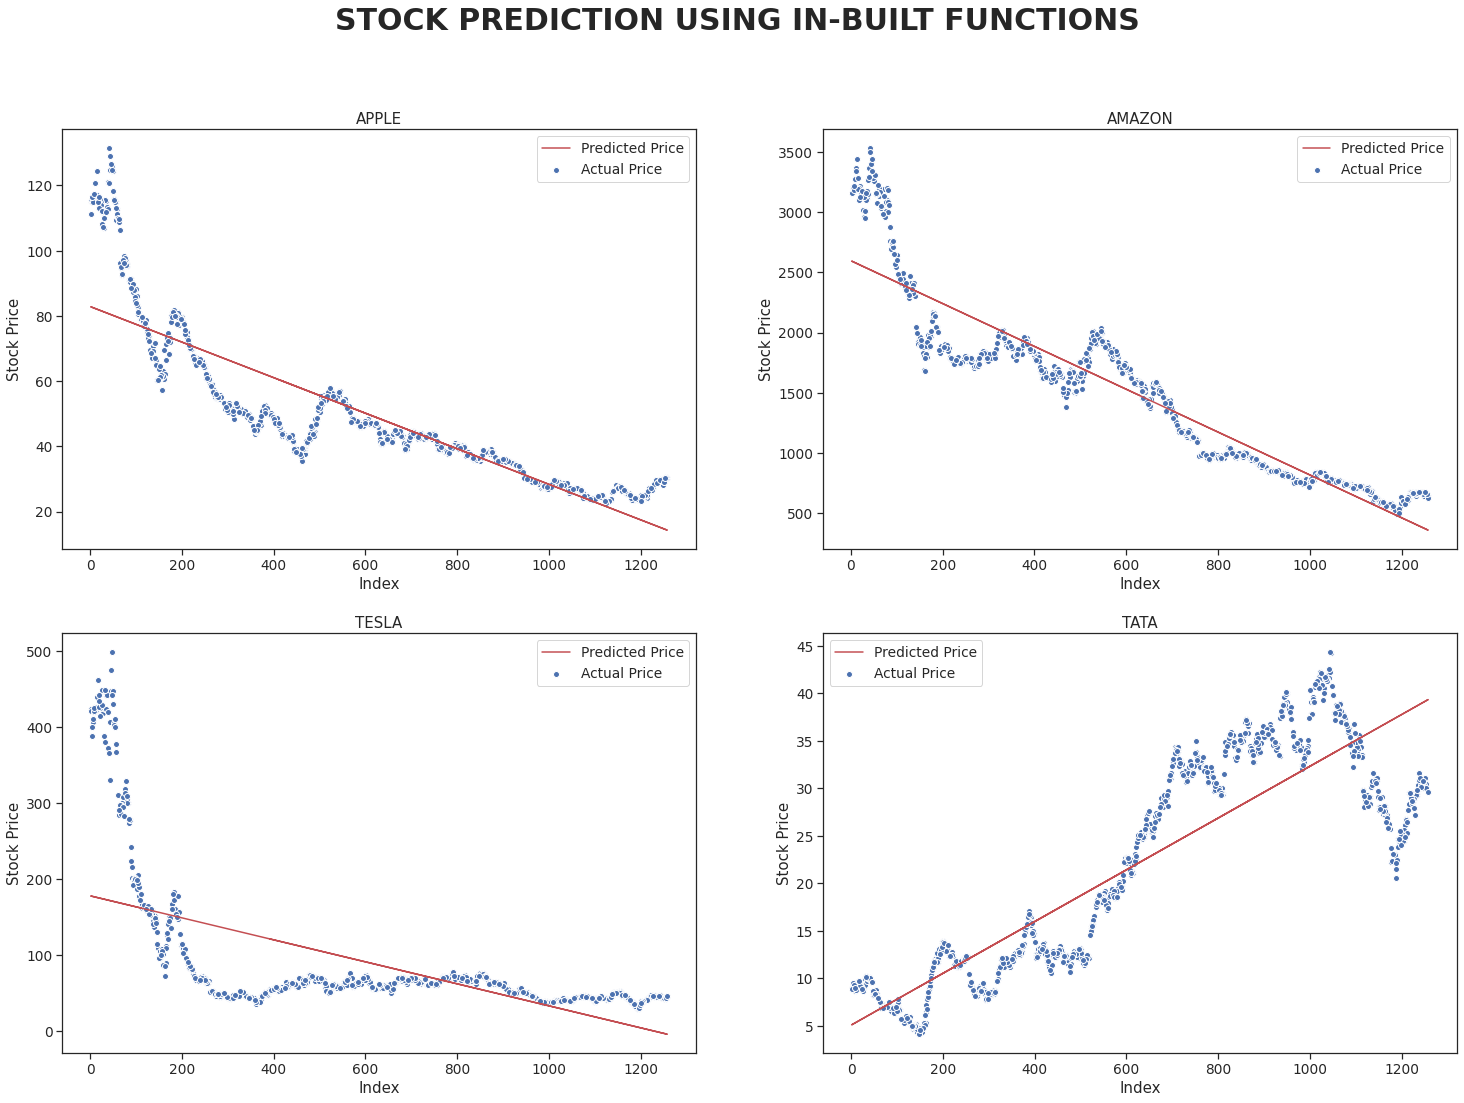

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(25,17))
fig.suptitle('STOCK PREDICTION USING IN-BUILT FUNCTIONS',fontsize=30, fontweight ="bold")

df1.index = df2.index
train1, test1 = train_test_split(df1, test_size=0.20)
X_train1 = np.array(train1.index).reshape(-1, 1)
y_train1 = train1[' Close/Last']
model = LinearRegression()
model.fit(X_train1, y_train1)
ax1.set_title('APPLE')
ax1.scatter(X_train1, y_train1, edgecolor='w', label='Actual Price')
ax1.plot(X_train1, model.predict(X_train1), color='r', label='Predicted Price')
ax1.set_xlabel('Index')
ax1.set_ylabel('Stock Price')
ax1.legend()

train2, test2 = train_test_split(df2, test_size=0.20)
X_train2 = np.array(train2.index).reshape(-1, 1)
y_train2 = train2[' Close/Last']
model = LinearRegression()
model.fit(X_train2, y_train2)
ax2.set_title('AMAZON')
ax2.scatter(X_train2, y_train2, edgecolor='w', label='Actual Price')
ax2.plot(X_train2, model.predict(X_train2), color='r', label='Predicted Price')
ax2.set_xlabel('Index')
ax2.set_ylabel('Stock Price')
ax2.legend()

train3, test3 = train_test_split(df3, test_size=0.20)
X_train3 = np.array(train3.index).reshape(-1, 1)
y_train3 = train3[' Close/Last']
model = LinearRegression()
model.fit(X_train3, y_train3)
ax3.set_title('TESLA')
ax3.scatter(X_train3, y_train3, edgecolor='w', label='Actual Price')
ax3.plot(X_train3, model.predict(X_train3), color='r', label='Predicted Price')
ax3.set_xlabel('Index')
ax3.set_ylabel('Stock Price')
ax3.legend()

train4, test4 = train_test_split(df4, test_size=0.20)
X_train4 = np.array(train4.index).reshape(-1, 1)
y_train4 = train4[' Close/Last']
model = LinearRegression()
model.fit(X_train4, y_train4)
ax4.set_title('TATA')
ax4.scatter(X_train4, y_train4, edgecolor='w', label='Actual Price')
ax4.plot(X_train4, model.predict(X_train4), color='r', label='Predicted Price')
ax4.set_xlabel('Index')
ax4.set_ylabel('Stock Price')
ax4.legend()

In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.7576019714334313


The R2 value shows that  the model accounts for nearly 75% of the differences between the actual stock prices and the predicted prices.